In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linalg as la
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
%precision 4
#ATTENTION: Dealing with some linear depedent variable sometimes the svd algorithm does not converge,
#I do not know if this is due to the version of numpy (1.19 gives sometimes some problems)
#Anyway in those cases it is sufficient to rerun the cell without changing anything

'%.4f'

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [2]:
N = 2000
x1 = np.random.normal(size = (N,1))
x2 = x1 + np.random.normal(scale = 3., size = (N,1))
x3 = 2*x1 + x2

X = np.concatenate((x1, x2, x3), axis = 1)
Sigma = np.cov(X.T)
avl, avt = la.eig(Sigma)
print("eigenvalues: ", np.real_if_close(avl))
print("eigenvectors:\n", avt)

eigenvalues:  [ 2.7795e+01 -2.7887e-16  1.9506e+00]
eigenvectors:
 [[-0.1116 -0.8165  0.5665]
 [-0.5822 -0.4082 -0.7031]
 [-0.8054  0.4082  0.4298]]


As we expected there is an eigenvalue that is almost zero ($<10^{-15}$). Remember that $x_3$ is a linear combination of the other two variables

In [3]:
U, D_diag, V = la.svd(X.T)
avl_svd = D_diag**2/(N-1)
avt_svd = U
print("eigenvalues from SVD: ", np.real_if_close(avl_svd))
print("eigenvectors from SVD:\n", avt_svd)

eigenvalues from SVD:  [2.7832e+01 1.9534e+00 2.1258e-30]
eigenvectors from SVD:
 [[-0.1118  0.5664 -0.8165]
 [-0.5819 -0.7034 -0.4082]
 [-0.8055  0.4295  0.4082]]


The two biggest eigenvalues calculated in the two methods are very similar. The third one is almost zero in both cases, the difference is probably due to the precision of the algorithms. Note the corrispondence of the eigenvectors.

The first two principal components express the 100.00 % of the dataset variability


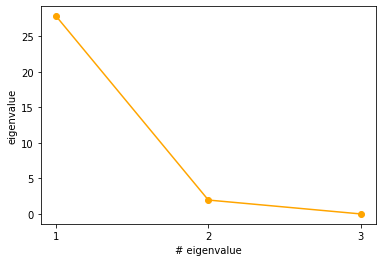

In [4]:
m = np.argsort(avl)[::-1]
avl_ordered = avl[m]
avt_T = avt.T
avt_T_ordered = avt_T[m]
vv = (avl_ordered[0]+avl_ordered[1])/avl.sum()
print("The first two principal components express the %.2f %% of the dataset variability" %(np.real_if_close(vv)*100))
fig, ax = plt.subplots()
ax.plot(np.arange(3)+1, np.real_if_close(avl_ordered), color = 'orange', marker = 'o')
ax.set_xlabel('# eigenvalue')
ax.set_ylabel('eigenvalue')
ax.xaxis.set_major_locator(MultipleLocator(1.000))
plt.show()

Looking at the rotation matrix we can analyze how the pricipal components can be computed from the initial data. For each principal component (column) and each feature (row), the biggest is an element of the rotation matrix, the strongest is the contribution of the feature to that principal component

In [5]:
XT = np.dot(avt_T_ordered, X.T).T
#Rotation of dataset with PCA eigenvectors
print(XT)

[[ 9.8035e+00  9.2944e-01  5.1951e-16]
 [-9.6346e+00 -1.9054e+00 -6.4141e-16]
 [ 5.8019e+00 -2.0806e-01  4.3840e-16]
 ...
 [ 7.5635e+00 -7.0607e-01  6.4609e-16]
 [ 3.8608e+00 -1.2382e+00  4.5096e-16]
 [-7.4997e+00  7.6674e-01 -6.1456e-16]]


Note that the rotated dataset has a third component that is neglegible with respect to the others

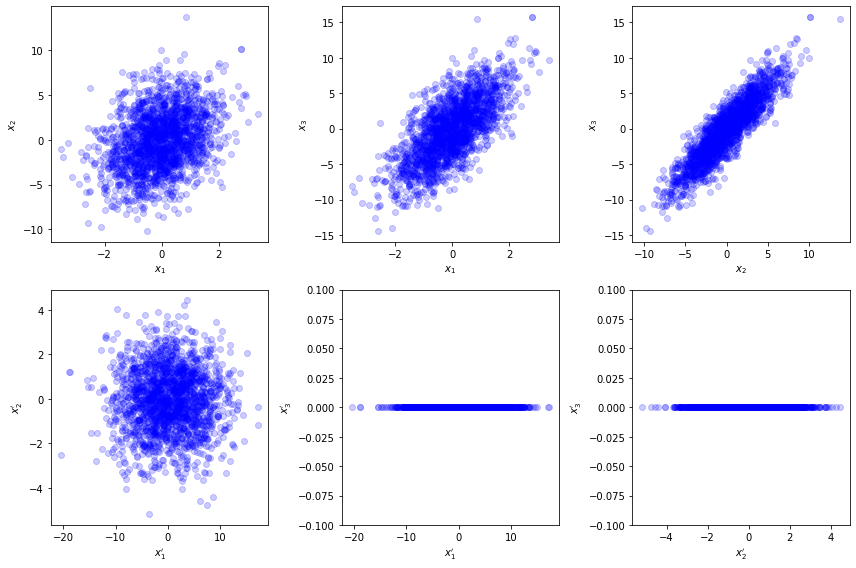

In [6]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
ax1.plot(X[:,0], X[:,1], 'bo', alpha = 0.2)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax2.plot(X[:,0], X[:,2], 'bo', alpha = 0.2)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_3$')
ax3.plot(X[:,1], X[:,2], 'bo', alpha = 0.2)
ax3.set_xlabel('$x_2$')
ax3.set_ylabel('$x_3$')
ax4.plot(XT[:,0], XT[:,1], 'bo', alpha = 0.2)
ax4.set_xlabel("$x_1'$")
ax4.set_ylabel("$x_2'$")
ax5.plot(XT[:,0], XT[:,2], 'bo', alpha = 0.2)
ax5.set_xlabel("$x_1'$")
ax5.set_ylabel("$x_3'$")
ax5.set_ylim(-0.1, 0.1)
ax6.plot(XT[:,1], XT[:,2], 'bo', alpha = 0.2)
ax6.set_xlabel("$x_2'$")
ax6.set_ylabel("$x_3'$")
ax6.set_ylim(-0.1, 0.1)
plt.tight_layout()
plt.show()

In the last two plots the y-range was chosen appositely to show the fact that the rotated datasets has neglegible variance along the third axis

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

[2.7832e+01 1.9534e+00 4.4795e-04 4.4331e-04 4.2703e-04 4.1589e-04
 4.0269e-04 3.9457e-04 3.8405e-04 3.7729e-04 3.5920e-04 3.4882e-04
 1.0056e-31]
The first two principal components express the 99.99 % of the dataset variability


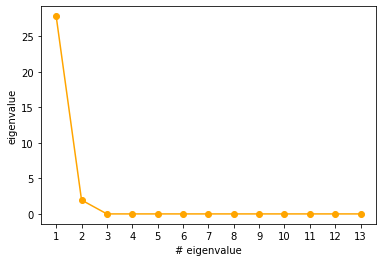

[[-0.1118  0.5664]
 [-0.5819 -0.7034]
 [-0.8055  0.4295]
 [-0.0001  0.0002]
 [ 0.0001 -0.0003]
 [ 0.0002  0.0002]
 [ 0.0001 -0.0005]
 [-0.      0.0001]
 [-0.0001  0.    ]
 [ 0.     -0.    ]
 [ 0.0001 -0.    ]
 [-0.0001  0.0004]
 [-0.0001 -0.0004]]


In [8]:
std = 1/50
X_noise = np.random.normal(scale = std, size=(N, 10))
X_new = np.concatenate((X, X_noise), axis = 1)
U, D_diag, V = la.svd(X_new.T)
avl_svd = D_diag**2/(N-1)
print(avl_svd)
vv = (avl_svd[0]+avl_svd[1])/avl_svd.sum()
print("The first two principal components express the %.2f %% of the dataset variability" %(np.real_if_close(vv)*100))
fig, ax = plt.subplots()
ax.plot(np.arange(13)+1, np.real_if_close(avl_svd), color = 'orange', marker = 'o')
ax.set_xlabel('# eigenvalue')
ax.set_ylabel('eigenvalue')
ax.xaxis.set_major_locator(MultipleLocator(1.000))
plt.show()

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
print(U[:,:2])

Also in this case most part of the variability of the dataset is expressed by the first two principal components. Looking at the eigenvalues it is possible to see that the two biggest eigenvalues are the same of the previous case. This is what we expected as we only introduced some incorrelated noise with a minor variance. Also the rotation matrix (here the first two vectors (# of chosen principal components) are printed) have the components related to the initial $x_1$, $x_2$, $x_3$ that are the same as before. This means that also the first two principal components are the same as before. The noise is totally uncorrelated so does not affect the first two eigenvectors

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


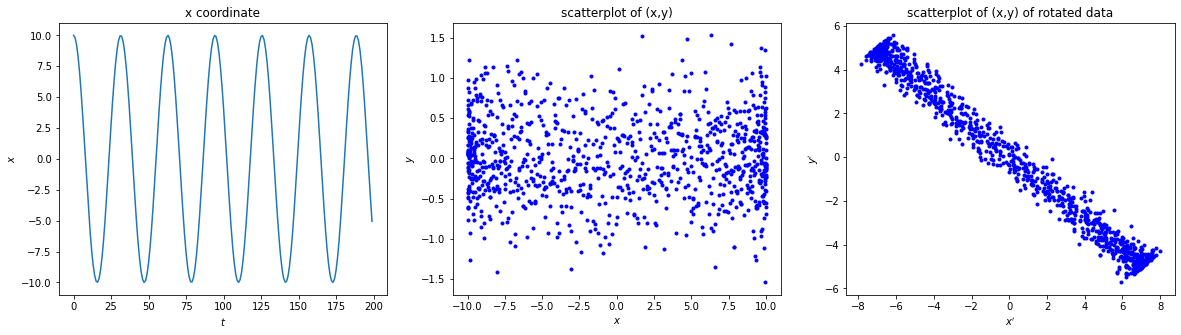

In [9]:
N = 1000
phi = 0
omega = 0.2
A = 10
t = np.arange(N)
def string(t, A, omega, phi):                       #Create the string motion
    return(A*np.cos(omega*t + phi))
x = string(t, A, omega, phi)[:,np.newaxis]
#plt.plot(t, x)
y = np.random.normal(scale = 0.5, size = (N, 1))
z = np.zeros((N, 1))
X = np.concatenate((x, y, z), axis = 1)
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))
ax1.plot(t[:int(N/5)], X[:int(N/5),0])                                        
ax1.set_xlabel('$t$')
ax1.set_ylabel('$x$')
ax1.set_title('x coordinate')
ax2.plot(X[:,0], X[:,1], 'b.')                       
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_title('scatterplot of (x,y)')

def rotation(X, Theta, Phi):
    Theta = Theta*np.pi/180
    Phi = Phi*np.pi/180
    Rtheta = np.array([[1, 0, 0],
                      [0, np.cos(Theta), np.sin(Theta)],
                      [0, -np.sin(Theta), np.cos(Theta)]])
    Rphi = np.array([[np.cos(Phi), np.sin(Phi), 0],
                    [-np.sin(Phi), np.cos(Phi), 0],
                    [0, 0, 1]])
    R = np.dot(Rtheta, Rphi)                           #Rotation matrix
    return np.dot(R, X.T).T, R

Xr, R = rotation(X, 45, 45)
ax3.plot(Xr[:,0], Xr[:,1], 'b.')
ax3.set_xlabel("$x'$")
ax3.set_ylabel("$y'$")
ax3.set_title('scatterplot of (x,y) of rotated data')
plt.show()

After creating the dataset, we used a rotation matrix to emulate the vision of a camera defined by ($\theta$, $\phi$) in spherical coordinates. Each camera is described by a rotation matrix $R$. In the plot it is shown the motion of the string in the $x$ coordinate and the scatterplots of the original camera ($\theta = 0$, $\phi = 0$) and the new camera after rotation.

Now we are going to analyze the dataset produced by the $i$-th camera defined by a couple of angles ($\theta_i$, $\phi_i$).

[4.9983e+01 2.5580e-01 3.8544e-32]
The first principal component express the 99.49 % of the dataset variability


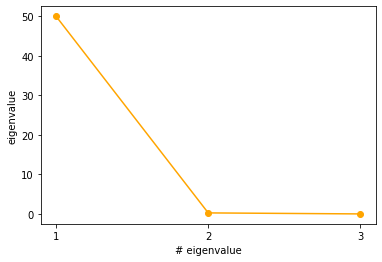

In [10]:
#PCA
np.set_printoptions(suppress=False)
U, D_diag, V = la.svd(Xr.T)
avl_svd = D_diag**2/(N-1)
print(avl_svd)
vv = avl_svd[0]/avl_svd.sum()
print("The first principal component express the %.2f %% of the dataset variability" %(np.real_if_close(vv)*100))
fig, ax = plt.subplots()
ax.plot(np.arange(3)+1, np.real_if_close(avl_svd), color = 'orange', marker = 'o')
ax.set_xlabel('# eigenvalue')
ax.set_ylabel('eigenvalue')
ax.xaxis.set_major_locator(MultipleLocator(1.000))
plt.show()

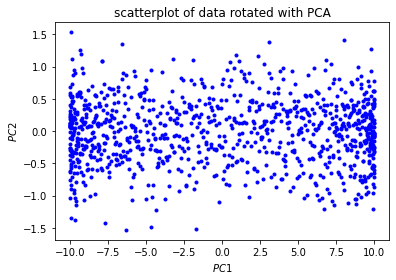

[[-7.0650e-01 -7.0771e-01  3.3226e-16]
 [ 5.0043e-01 -4.9957e-01  7.0711e-01]
 [-5.0043e-01  4.9957e-01  7.0711e-01]]
[[ 0.7071  0.7071  0.    ]
 [-0.5     0.5     0.7071]
 [ 0.5    -0.5     0.7071]]


In [11]:
Xrr = np.dot(Xr, U) #Applying PCA rotation
plt.plot(Xrr[:,0], Xrr[:,1], 'b.')
plt.xlabel('$PC1$')
plt.ylabel('$PC2$')
plt.title('scatterplot of data rotated with PCA')
plt.show()
print(U)
print(la.inv(R).T)

As can be seen in the figure, rotating the $i$-th camera dataset with the PCA, we obtain the original figure with no rotations (or a reflected one). That means that the principal components of the figure are the original cardinal axes. Notice that the matrix $U$ is the same as matrix $R^{-1}$ except from some sign that causes some axis to be reflected. This means that rotating the i-th camera dataset with PCA we obtain the original created dataset

Now we are going to create a dataset which features are the coordinates of many cameras (6 in total)

In [14]:
n = 6 #number of cameras
Theta = [0, 30, 60, 90, 120, 150]
Phi = [0, 60, 120, 180, 240, 300]
Data = np.zeros((N, 3*n))
for i in range(n):
    Data[:, 3*i:3*i+3], _ = rotation(X, Theta[i], Phi[i])
    
names = ['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4', 'x5', 'y5', 'z5', 'x6', 'y6', 'z6']
DF = pd.DataFrame(Data, columns = names)
DF

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,x5,y5,z5,x6,y6,z6
0,10.000000,-0.110190,0.0,4.904573,-7.547714,4.357675,-5.095427,-4.302580,7.452286,-10.000000,6.747194e-18,-0.110190,-4.904573,-4.357675,-7.547714,5.095427,-7.452286,-4.302580
1,9.800666,0.464278,0.0,5.302410,-7.149461,4.127743,-4.498256,-4.359882,7.551538,-9.800666,-2.842884e-17,0.464278,-5.302410,-4.127743,-7.149461,4.498256,-7.551538,-4.359882
2,9.210610,0.342872,0.0,4.902241,-6.759489,3.902593,-4.308369,-4.074029,7.056425,-9.210610,-2.099487e-17,0.342872,-4.902241,-3.902593,-6.759489,4.308369,-7.056425,-4.074029
3,8.253356,-0.545573,0.0,3.654198,-6.426257,3.710201,-4.599158,-3.437415,5.953777,-8.253356,3.340672e-17,-0.545573,-3.654198,-3.710201,-6.426257,4.599158,-5.953777,-3.437415
4,6.967067,0.524422,0.0,3.937696,-4.998219,2.885723,-3.029371,-3.147934,5.452382,-6.967067,-3.211159e-17,0.524422,-3.937696,-2.885723,-4.998219,3.029371,-5.452382,-3.147934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-4.716257,0.294726,0.0,-2.102888,3.664813,-2.115881,2.613369,1.968518,-3.409573,4.716257,-1.804676e-17,0.294726,2.102888,2.115881,3.664813,-2.613369,3.409573,1.968518
996,-2.870382,0.330026,0.0,-1.149380,2.295692,-1.325418,1.721002,1.160405,-2.009881,2.870382,-2.020826e-17,0.330026,1.149380,1.325418,2.295692,-1.721002,2.009881,1.160405
997,-0.910074,0.479668,0.0,-0.039633,0.890258,-0.513991,0.870441,0.274157,-0.474853,0.910074,-2.937117e-17,0.479668,0.039633,0.513991,0.890258,-0.870441,0.474853,0.274157
998,1.086516,-0.413873,0.0,0.184833,-0.994099,0.573943,-0.901683,-0.367007,0.635674,-1.086516,2.534244e-17,-0.413873,-0.184833,-0.573943,-0.994099,0.901683,-0.635674,-0.367007


PCA is performed with this new dataset

[2.9990e+02 1.5348e+00 4.2339e-29 2.2086e-31 1.3696e-31 1.0768e-31
 9.0322e-32 7.2367e-32 6.5319e-32 5.5783e-32 4.0940e-32 3.1772e-32
 2.6606e-32 2.1906e-32 1.6799e-32 3.0526e-33 2.0641e-64 2.0043e-66]
The first principal component express the 99.49 % of the dataset variability


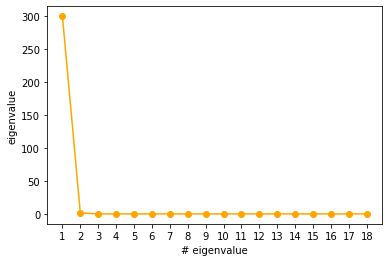

[-4.0825e-01  3.4796e-04  0.0000e+00 -2.0382e-01  3.0634e-01 -1.7686e-01
  2.0443e-01  1.7669e-01 -3.0604e-01  4.0825e-01 -2.1306e-20  3.4796e-04
  2.0382e-01  1.7686e-01  3.0634e-01 -2.0443e-01  3.0604e-01  1.7669e-01]


In [15]:
#PCA
U, D_diag, V = la.svd(Data.T)
avl_svd = D_diag**2/(N-1)
print(avl_svd)
vv = avl_svd[0]/avl_svd.sum()
print("The first principal component express the %.2f %% of the dataset variability" %(np.real_if_close(vv)*100))
fig, ax = plt.subplots()
ax.plot(np.arange(18)+1, np.real_if_close(avl_svd), color = 'orange', marker = 'o')
ax.set_xlabel('# eigenvalue')
ax.set_ylabel('eigenvalue')
ax.xaxis.set_major_locator(MultipleLocator(1.000))
plt.show()

print(U[:,0])

In [16]:
Data_pca = np.dot(Data, U)
DF = pd.DataFrame(Data_pca)
DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-24.495119,0.249032,8.925172e-15,1.821858e-15,1.733131e-15,-2.315625e-15,-4.638305e-16,1.131435e-15,-1.314195e-15,-2.024046e-16,-1.292209e-16,4.272079e-16,3.038791e-16,1.896581e-15,-7.286604e-16,5.537779e-17,-2.409485e-31,2.097975e-31
1,-24.005652,-1.157706,9.345151e-15,4.072797e-15,1.027507e-15,-2.576919e-15,-1.765003e-16,1.441372e-15,-2.123259e-15,-5.088961e-16,-6.105012e-16,3.078642e-16,-4.629328e-17,2.072085e-15,-2.691992e-16,-2.857358e-16,-8.146865e-31,1.042755e-30
2,-22.560571,-0.859091,8.115536e-15,3.548950e-15,7.113426e-16,-2.559121e-15,-2.134102e-16,9.356080e-16,-1.955847e-15,-7.382229e-16,2.115143e-16,1.274285e-16,2.010771e-15,1.144269e-15,-2.146908e-16,-2.317175e-16,-7.979812e-31,1.641243e-30
3,-20.217643,1.319144,7.977557e-15,1.853768e-15,1.470114e-15,-8.237293e-16,-5.940263e-16,6.470644e-16,-1.311980e-15,-3.998819e-16,8.851129e-17,7.498804e-16,7.736243e-16,1.021906e-15,-2.252236e-17,8.934694e-17,-3.389777e-31,3.585344e-31
4,-17.064658,-1.299111,5.970600e-15,1.720599e-15,2.783385e-16,-1.043868e-15,2.432958e-16,5.269266e-16,-1.411166e-15,-3.172145e-17,1.496538e-16,5.439986e-16,7.796515e-16,6.734937e-16,-1.627413e-16,-3.194394e-16,-4.388701e-31,1.203511e-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11.553035,-0.712082,-4.325490e-15,-1.187091e-15,-2.724557e-16,1.242585e-15,5.923932e-18,-3.688290e-16,1.023299e-15,3.724161e-16,5.499458e-17,-4.077439e-16,3.508187e-17,-2.992559e-16,-1.066766e-16,-8.382004e-17,6.271517e-31,4.739480e-33
996,7.031658,-0.802402,-2.501397e-15,-1.083662e-15,-4.505736e-16,7.279887e-16,2.583644e-16,-3.369524e-16,5.156313e-17,3.012171e-16,1.778118e-16,-5.009780e-16,-2.309182e-16,3.723711e-17,-2.115921e-18,-1.996121e-18,-1.506527e-32,-2.011774e-31
997,2.230218,-1.173041,-6.729828e-16,-1.379436e-16,-4.309228e-16,2.925637e-16,8.993825e-17,2.060385e-17,1.850751e-16,6.817704e-17,6.633650e-17,-1.268004e-16,-7.089528e-17,-8.425997e-17,-5.861164e-17,-2.145041e-16,4.079038e-32,1.165554e-32
998,-2.662272,1.011510,9.646350e-16,3.145793e-16,2.638637e-16,-2.406140e-16,-9.893323e-17,7.948670e-17,-2.880912e-17,5.213768e-18,-9.769234e-17,9.235099e-17,3.248810e-17,1.846716e-16,8.374380e-17,7.980009e-17,-1.247195e-31,4.917188e-32


Notice that the rotated dataset has only two features that are not neglegible. In particular as can be seen looking at the eigenvalues, almost the total of variability can be expressed by the first principal component. We are going to plot the first two principal components.

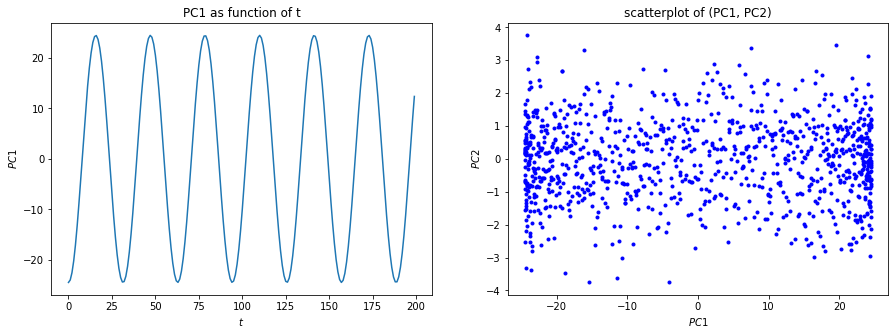

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax1.plot(t[:int(N/5)], Data_pca[:int(N/5),0])
ax1.set_xlabel('$t$')
ax1.set_ylabel('$PC1$')
ax1.set_title('PC1 as function of t')
ax2.plot(Data_pca[:,0], Data_pca[:,1], 'b.')
ax2.set_xlabel('$PC1$')
ax2.set_ylabel('$PC2$')
ax2.set_title('scatterplot of (PC1, PC2)')
plt.show()

The plot in the left shows the oscillating behaviour of the first principal component. The second one is a scatterplot of the first two principal components. The two plots resemble the ones concerning the camera at $\theta=0$, $\phi=0$ but rescaled (due to the fact that tha dataset is composed by n observations) and reflected. 
This means that the first principal component, the one which express the biggest part of the dataset variability, is linked to the $x$ component of the string as seen by the camera at ($\theta=0$, $\phi=0$)

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [18]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

In [19]:
labels = ['fLength','fWidth','fSize','fConc','fConc1','fAsym', 'fM3Long','fM3Trans','fAlpha','fDist','category']
Data = pd.read_csv('data/magic04.data', names = labels)
Data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,category
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [20]:
X = Data.values[:,:-1]
N = X.shape[0]
X = X.astype('float64')
H = np.eye(N)-1/N*np.ones((N,1)).dot(np.ones((1,N)))    #Centering matrix
S = np.cov(X.T)
XS = np.dot(H, X) #Centred data
np.set_printoptions(precision=0)
np.set_printoptions(suppress=True)
print("Covariance matrix:\n", np.cov(XS.T))

Covariance matrix:
 [[1795.  599.   14.   -5.   -3. -924. -259.   12.  -10. 1325.]
 [ 599.  337.    6.   -2.   -1. -290. -165.   15.   32.  462.]
 [  14.    6.    0.   -0.   -0.   -4.    2.    0.   -2.   15.]
 [  -5.   -2.   -0.    0.    0.    1.   -1.   -0.    1.   -4.]
 [  -3.   -1.   -0.    0.    0.    1.   -1.   -0.    1.   -3.]
 [-924. -290.   -4.    1.    1. 3505.  827.    3.  -86. -915.]
 [-259. -165.    2.   -1.   -1.  827. 2601.  -18. -248.  141.]
 [  12.   15.    0.   -0.   -0.    3.  -18.  434.    3.   18.]
 [ -10.   32.   -2.    1.    1.  -86. -248.    3.  681. -430.]
 [1325.  462.   15.   -4.   -3. -915.  141.   18. -430. 5585.]]


We are going to apply the PCA on Centred Data ($Mean = [0, 0,...,0]$)

[47740.94   4198.561  2084.526  1338.613   821.44    433.667   117.362
     0.564     0.035     0.   ]


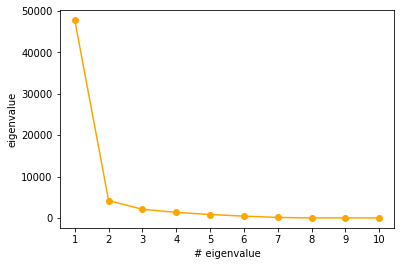

[0.841 0.915 0.952 0.976 0.99  0.998 1.    1.    1.    1.   ]


In [22]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
U, D_diag, V = la.svd(X.T)
avl_svd = D_diag**2/(N-1)
print(avl_svd)
fig, ax = plt.subplots()
ax.plot(np.arange(len(avl_svd))+1, np.real_if_close(avl_svd), color = 'orange', marker = 'o')
ax.set_xlabel('# eigenvalue')
ax.set_ylabel('eigenvalue')
ax.xaxis.set_major_locator(MultipleLocator(1.000))
plt.show()

fr = avl_svd/avl_svd.sum() 
print(fr.cumsum()) #Cumulant of variability expressed

As can be seen from the vector 'cumsum' the first 2 principal components express the 91% of variability, the first 3 principal components express the 95% of variability

In [23]:
print(U[:,:3])

[[-0.266 -0.237 -0.065]
 [-0.108 -0.083  0.025]
 [-0.012  0.002  0.001]
 [-0.002  0.001  0.001]
 [-0.001  0.     0.001]
 [ 0.045  0.815  0.511]
 [-0.047  0.512 -0.841]
 [-0.002 -0.002  0.011]
 [-0.111 -0.032  0.15 ]
 [-0.949  0.093  0.064]]


From the rotation matrix we can see that the first principal component reflects principally the 'fDist' feature, the second reflects more the 'fAsym' variable, the third is bounded to the 'fM3Long' variable

We are going to repeat the PCA analysis on Standardized Data ($Mean = [0, 0,...,0]$, $Cov = Corr$) in order to avoid big eigenvalues due to different scales of measure. 

In [24]:
D = np.diag(np.diag(S)**(-0.5))
XS = np.dot(H, np.dot(X, D))
print(np.cov(XS.T))
"""Note that the covarince matrix is a correlaton matrix. This means that data are standardized"""

[[ 1.     0.771  0.702 -0.631 -0.598 -0.369 -0.12   0.013 -0.009  0.418]
 [ 0.771  1.     0.718 -0.61  -0.581 -0.267 -0.176  0.04   0.066  0.337]
 [ 0.702  0.718  1.    -0.851 -0.809 -0.16   0.095  0.015 -0.187  0.437]
 [-0.631 -0.61  -0.851  1.     0.976  0.112 -0.122 -0.011  0.235 -0.328]
 [-0.598 -0.581 -0.809  0.976  1.     0.1   -0.119 -0.011  0.23  -0.305]
 [-0.369 -0.267 -0.16   0.112  0.1    1.     0.274  0.003 -0.056 -0.207]
 [-0.12  -0.176  0.095 -0.122 -0.119  0.274  1.    -0.017 -0.186  0.037]
 [ 0.013  0.04   0.015 -0.011 -0.011  0.003 -0.017  1.     0.005  0.011]
 [-0.009  0.066 -0.187  0.235  0.23  -0.056 -0.186  0.005  1.    -0.221]
 [ 0.418  0.337  0.437 -0.328 -0.305 -0.207  0.037  0.011 -0.221  1.   ]]


'Note that the covarince matrix is a correlaton matrix. This means that data are standardized'

[4.224 1.575 1.012 0.994 0.742 0.65  0.408 0.22  0.155 0.02 ]


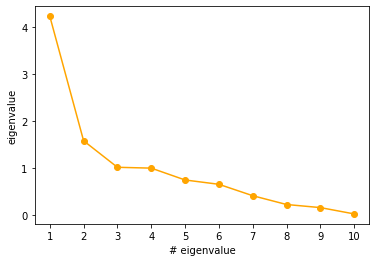

[0.422 0.58  0.681 0.78  0.855 0.92  0.96  0.983 0.998 1.   ]


In [25]:
U, D_diag, V = la.svd(XS.T)
avl_svd = D_diag**2/(N-1)
print(avl_svd)
fig, ax = plt.subplots()
ax.plot(np.arange(len(avl_svd))+1, np.real_if_close(avl_svd), color = 'orange', marker = 'o')
ax.set_xlabel('# eigenvalue')
ax.set_ylabel('eigenvalue')
ax.xaxis.set_major_locator(MultipleLocator(1.000))
plt.show()

fr = avl_svd/avl_svd.sum() 
print(fr.cumsum()) #Cumulant of variability expressed

As can be seen from the vector 'cumsum' the first 5 principal componets of the standardized data express the 85% of variability

In [26]:
print(U[:,:5])

[[-0.408  0.226 -0.001 -0.025  0.119]
 [-0.395  0.245 -0.153 -0.095  0.058]
 [-0.449 -0.093 -0.071 -0.057  0.016]
 [ 0.442  0.188  0.129  0.109  0.181]
 [ 0.429  0.196  0.139  0.116  0.206]
 [ 0.145 -0.487 -0.377 -0.214 -0.023]
 [-0.005 -0.6   -0.058 -0.054  0.599]
 [-0.012  0.031 -0.603  0.795  0.008]
 [ 0.097  0.457 -0.47  -0.386  0.526]
 [-0.257 -0.012  0.454  0.364  0.521]]


From the rotation matrix (first 5 vector) it is not easy to see a clear dependence of pricipal components from a specific data feature. Every principal component reflects a combination of at least 3-4 features
(i.e. the first pricipal component reflects a combination among the first 5 features, which rotation elements are bigger that the other and are similar among them). 

The standardization changed the computation of Principal Components avoiding to give more weight to the features with the biggest variance. As mentioned before, PCA on standardized data can be used when variables are measured with different scales or are distrubuted in very different intervals. 